,show_id,type,title,release_year,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,2007,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,2018,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,2009,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,2006,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


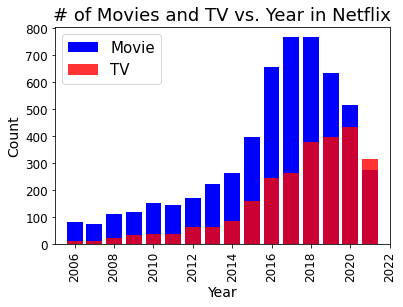

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re

netflix = pd.read_csv("netflix_titles.csv")

# Drop columns that is not needed
netflix_df = netflix[['type', 'release_year']]
netflix_df = netflix.dropna(axis=1)

# list of movie and tv by year and type
movie_maps = []
tv_maps = []

# Store Type and Year into movie_maps and tv_maps 
for index, row in netflix_df.iterrows():
    if netflix_df.loc[index, 'release_year'] > 2005 and netflix_df.loc[index, 'type'] == "Movie":
        
        movie_maps.append([netflix_df.loc[index, 'release_year'], netflix_df.loc[index, 'type']])
        
    elif netflix_df.loc[index, 'release_year'] > 2005 and netflix_df.loc[index, 'type'] == "TV Show":
        
        tv_maps.append([netflix_df.loc[index, 'release_year'], netflix_df.loc[index, 'type']])
    
tv_df = pd.DataFrame(tv_maps)
movie_df = pd.DataFrame(movie_maps)

groupby_tv = tv_df.groupby(0).count().reset_index() 
groupby_movie = movie_df.groupby(0).count().reset_index() 

merge_df = groupby_tv.merge(groupby_movie, left_on=0, right_on=0)
merge_df.rename(columns = {0:'Year', '1_x':'TV', '1_y':'Movie'}, inplace = True)

plt.bar(merge_df['Year'], merge_df['Movie'], color='b')
plt.bar(merge_df['Year'], merge_df['TV'], color='r', alpha=0.8)

plt.xlabel("Year", size=14)
plt.xticks(fontsize=12, rotation=90)
plt.xlim(2005, 2022)
plt.ylabel("Count", size=14)
plt.yticks(fontsize=12)
plt.title("# of Movies and TV vs. Year in Netflix", size=18)

plt.legend(['Movie', 'TV'], loc='upper left', fontsize=15)

plt.savefig("output.png");

netflix_df

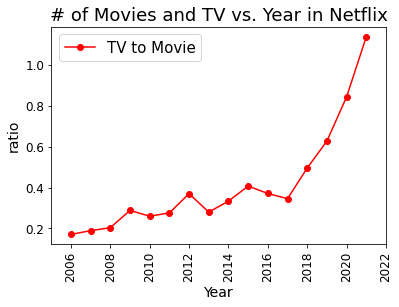

In [2]:
#TV to Movie

plt.plot(groupby_tv[0], groupby_tv[1]/groupby_movie[1], 'r', marker='o')

plt.xlabel("Year", size=14)
plt.xticks(fontsize=12, rotation=90)
plt.xlim(2005, 2022)
plt.ylabel("ratio", size=14)
plt.yticks(fontsize=12)

plt.title("# of Movies and TV vs. Year in Netflix", size=18)

plt.legend(['TV to Movie'], loc='upper left', fontsize=15)

plt.savefig("TV_To_Movie_Ratio.png");

In [485]:
#Statistical Analysis - Each country mean duration~

In [521]:
duration_df = netflix.loc[netflix['type'] == 'Movie'][['type', 'country', 'duration']].dropna(axis=0)

Time=[]
Country=[]

for time in duration_df['duration']:
    
    Time.append(int(time.split(" ")[0]))

for country in duration_df['country']:
    Country.append(country)

dur_cnt_dict = {"country": Country,
                "duration": Time
               }

dur_cnt_df = pd.DataFrame(dur_cnt_dict)

temp = dur_cnt_df.groupby('country').mean().sort_values(by='duration', ascending=False).reset_index()

UnitedStates=0
num = 0

for index, row in temp.iterrows():
    if re.search('United State.', temp.loc[index, 'country']):
        UnitedStates = UnitedStates + temp.loc[index, 'duration']
        num+=1
            



104.22102164107665